# <font size=20 color=Teal>Algoritmos Supervisionados(Python)

***
## Análise Exploratória de Dados
***

<font size=4> **Importar das bibliotecas, p/ ajuda na análise dos dados**

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.style.use('ggplot')

<font size=4>**Sobre a base de dados Empréstimo**

- **Default**: indica se a pessoa pagou ou não o empréstimo
    * 0 = pagou
    * 1 = não pagou

- **clientid**: considerado uma variável categorica nominal. Considerado o 'CPF' do cliente.

- **income**: renda da pessoa. Var numerica e contínua.

- **age**: idade da pessoa. var do tipo contínuo, devido haver numeros após o '.', caso contrário seria discreta.

- **loan**: dívida que a pessoa possuí, var numerica contínua.



In [3]:
# Abertura do arquivo csv, nomear as colunas, colocar como cabeçalho
df = pd.read_csv('credit_data.csv', names=['id','renda', 'idade', 'divida', 'resposta'],header=0)
# Excluir a coluna 'id'
df = df[['renda', 'idade', 'divida', 'resposta']]
df.head()

,renda,idade,divida,resposta
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1


<font size=4>**Visualizar os dados estatísticos**

> Corrigir os registros:  
* idade = valor negativo


In [5]:
df[['renda', 'idade', 'divida']].describe().T

,count,mean,std,min,25%,50%,75%,max
renda,2000.0,45331.600018,14326.327119,20014.48947,32796.459717,45789.117313,57791.281668,69995.685578
idade,1997.0,40.807559,13.624469,-52.42328,28.990415,41.317159,52.587040,63.971796
divida,2000.0,4444.369695,3045.410024,1.37763,1939.708847,3974.719419,6432.410625,13766.051239


<font size=4>**Informações gerais sobre o Dataset**
- Total de linhas: 2 mil linhas
- Total de colunas: 5, sendo 2 tipo inteiro e 3 do tipo flutuante
- Na coluna 'idade', estão faltando 3 registros

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   renda     2000 non-null   float64
 1   idade     1997 non-null   float64
 2   divida    2000 non-null   float64
 3   resposta  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


<font size=4>**Quantidade de registros repetidos na variável 'resposta'**
- '0' = Bom pagador (1717 - exemplos)
- '1' = Mau pagador (283 - exemplos)

Está discrepância dos dados, irá pesa mais para o lado dos bons pagadores, afetando o julgamento do algoritmo no momento que for realizada a predição.

In [ ]:
df.resposta.value_counts()

0    1717
1     283
Name: resposta, dtype: int64

<font size=4>**Somar a quantidade de valores nulos dentro do dataset**
- Na variável 'idade', temos 3 registros em faltando

In [ ]:
df.isnull().sum()

renda       0
idade       3
divida      0
resposta    0
dtype: int64

**Somar a quantidade de valores duplicados**

In [6]:
duplicados = df.duplicated().sum()
print(f'Numer de linhas duplicadas: {duplicados}')

Numer de linhas duplicadas: 0


***
## Pré-Processamento com Limpeza dos Dados
***

<font size=4>**Visualizar os registros que tenha idade negativa**

In [7]:
df.query('idade <= 0')

,renda,idade,divida,resposta
15,50501.726689,-28.218361,3977.287432,0
21,32197.620701,-52.423280,4244.057136,0
26,63287.038908,-36.496976,9595.286289,0


<font size=4> **Tratar os dados de idade negativa**
- Criar uma função para substituir valores negativos por positivos
- Substitui valor negativo por seu valor absoluto
- Mantém valores positivos inalterados

In [8]:
def substituir_negativo(valor):
    if valor < 0:       # se o valor for menor que '0'
        return -valor     #  Substitui valor negativo por seu valor absoluto
    else:                  # caso contrário
        return valor        # mantenha o valor positivo


# Aplicar a função à coluna "idade" do DataFrame
df['idade'] = df['idade'].apply(substituir_negativo)
df.query('idade <= 0')      # Visualizar o filtro de valores negativos, para testar o tratamento

,renda,idade,divida,resposta


<font size=4>**Tratar os valores faltantes**
- Tirar a média de idade do dataset, salvar em uma variável
- Adicionar está variável ao dataset para tratar os dados faltantes
- Fazer a verificação dos dados faltantes, para tirar as devidas conclusões

In [9]:
# Tirar a média da coluna idade
media = df.idade.mean()
# Substituir média pelo os valores negativos
df.fillna(media, inplace=True)
df.isnull().sum()

renda       0
idade       0
divida      0
resposta    0
dtype: int64

<font size=4>**Visualizar as mudanças que ocorreram após o tratamento de dados**
- Tratamento foi realizado com sucesso!!
- Tantos os dados faltantes, como os negativos da variável 'idade', foram tratados.

In [11]:
df.idade.describe()

count    2000.000000
mean       40.924874
std        13.257782
min        18.055189
25%        29.062492
50%        41.310898
75%        52.582340
max        63.971796
Name: idade, dtype: float64

**Identifique valores discrepantes com base no IQR na coluna 'Renda'**

In [19]:

Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = (df['renda'] < limite_inferior) | (df['renda'] > limite_superior)

print(f'Numero de outliers em Renda média: {outliers.sum()}')

Numero de outliers em Renda média: 0


**Dashboards**

In [20]:
df.head(2)

,renda,idade,divida,resposta
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0


/tmp/ipykernel_2335/3917676987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=plu_codes, y=unique_counts, palette='viridis')


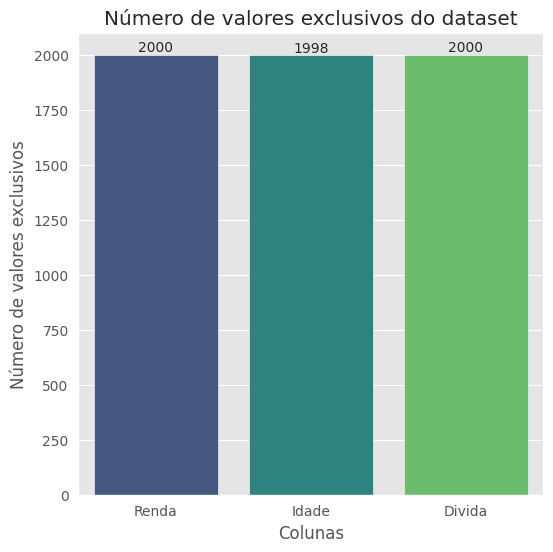

In [25]:
# Número de valores únicos 
unique_counts = [df['renda'].nunique(), df['idade'].nunique(), df['divida'].nunique()]
plu_codes = ['Renda', 'Idade', 'Divida']

# Bar plot
plt.figure(figsize=(6, 6))
barplot = sns.barplot(x=plu_codes, y=unique_counts, palette='viridis')
plt.title('Número de valores exclusivos do dataset')
plt.xlabel('Colunas')
plt.ylabel('Número de valores exclusivos')

# Adicione valores de dados no topo das barras
for i, count in enumerate(unique_counts):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

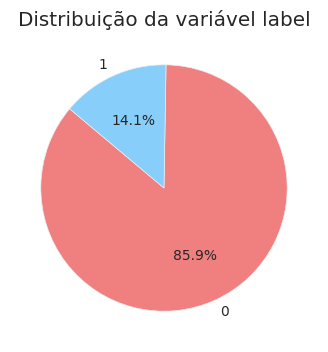

In [27]:
# Calcula a distribuição do 'tipo'
type_distribution = df['resposta'].value_counts()

# Cria dados para o gráfico de pizza
sizes = type_distribution.values
labels = type_distribution.index
colors = ['lightcoral', 'lightskyblue']

# Plot o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da variável label')
plt.show()

/tmp/ipykernel_2335/2766949128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=base['idade'], y=base['renda'], palette='viridis')


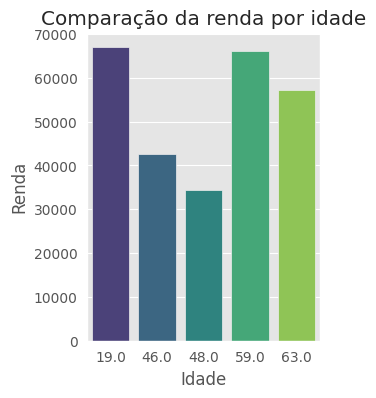

In [60]:
base = df[['renda', 'idade']].head().round()
plt.figure(figsize=(3, 4))
sns.barplot(x=base['idade'], y=base['renda'], palette='viridis')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.title('Comparação da renda por idade')
plt.show()

***
## Machine Learning
***

<font size=4>**Separar as Features da Label**

**Features (Características):**
- Features são as variáveis independentes que você utiliza para fazer previsões ou classificações em um modelo de machine learning.
- São os atributos ou informações que o modelo utiliza como entrada para realizar suas previsões.

**Label (Rótulo ou Alvo):**
- O label é a variável dependente que você está tentando prever com base nas features.
- É o resultado ou a saída desejada do modelo. É o que você está tentando "aprender" com base nos padrões nos dados.
- No exemplo da previsão de empréstimo, o label seria fulano é bom ou mau pagador de empréstimo.

In [12]:
# Usando para salvar os dados
import pickle
# # Dividir os dados em conjunto de treinamento e conjunto de teste
from sklearn.model_selection import train_test_split

- X são as features (características) dos dados
- y são os rótulos (labels) correspondentes
- test_size é a proporção dos dados que será usada como conjunto de teste (30% neste exemplo)
- random_state é uma semente de aleatoriedade para garantir que a divisão seja sempre a mesma

In [13]:
features = df[['renda','idade','divida']]
labels = df['resposta']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=123)

<font size=4> **Visualizar as novas variáveis criadas**

In [14]:
print('labels:',y_train.shape, '\n\nFeatures: ', x_train)

labels: (1400,) 

Features:               renda      idade       divida
1404  28423.131471  61.671459  5282.849182
172   26039.021490  49.390402  2056.752382
712   47786.141064  29.708189  7181.478553
866   35950.488450  35.471847  2664.925675
1217  29279.749787  18.813099  2291.988119
...            ...        ...          ...
1122  23626.726789  34.293353  2173.767690
1346  48290.880460  30.036761  4902.975221
1406  25636.333569  55.782057  1239.688258
1389  39553.647377  53.690633  7063.898036
1534  38160.116498  31.328122  3429.901579

[1400 rows x 3 columns]


<font size=4>**Criar uma nova base de dados¶**

- Com as amostras já criadas pelo train_test_split

In [15]:
import pickle

with open('emprestimo_data.pkl', mode = 'wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)

**Abrir a base criada já seperando as amostras**

In [17]:
with open('emprestimo_data.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

x_train.shape, y_train.shape

((1400, 3), (1400,))

***
## Desenvolvimento de Modelos:
***

###  <font color=blue>K-Nearest Neighbour (KNN) - Modelo

**K vizinhos mais próximos**

* A maioria dos métodos de aprendizagem controem um modelo após o treinamento (os dados são descartados após a criação do modelo)

* Métodos baseados em instâncias simplesmente armazenam os exemplos de treinamento

* A generalização/ previsão é feita somente quando uma nova instância precisa ser classificada (lazy)

**Características**

* Algoritmo simples e poderoso
* Indicado quando o relacionamento entre as características é complexo
* **Valor de k pequeno:** dados com ruídos ou outliers podem prejudicar
* **Valor de k grande:** tendência a clasificar a classe com mais  elementos (overfitting) - valor default 3 ou 5

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  # modelo
from sklearn.metrics import accuracy_score, classification_report  # avaliação

**<font size=3>Criar um Pipeline**
- **Pipeline**: em aprendizado de máquina é uma sequência de etapas de processamento de dados que são executadas em uma ordem específica para realizar uma tarefa de ponta a ponta, desde o pré-processamento de dados até a criação e avaliação de modelos.

- **StandardScaler:** é uma técnica de pré-processamento comumente usada em aprendizado de máquina para padronizar (ou normalizar) os recursos (features) de um conjunto de dados. Sua finalidade é garantir que as características tenham média zero e desvio padrão igual a um. Isso é útil porque muitos algoritmos de machine learning assumem que os dados estão distribuídos de forma aproximadamente normal e que todas as características têm a mesma escala.

- **Criação do Modelo**: KNN

In [ ]:
knn = Pipeline([
        ('scaler', StandardScaler()),  # Normalização dos dados
        ('imputer', SimpleImputer(strategy='median')),  # substitui os valores NaN pela mediana
        ('knn',  KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,))  # 5 vizinhos
])

knn.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('knn', KNeighborsClassifier())])

**Previsões da máquina de Machine Learning**

In [ ]:
previsoes = knn.predict(x_test)

<font size=3>**Salvar o modelo**

In [ ]:
pickle.dump(knn, open('knn.sav', 'wb'))

<font size=3>**Abrir o modelo**

In [ ]:
knn = pickle.load(open('knn.sav', 'rb'))

###  <font color=green>Decision Tree - Modelo

**Poda em árvore de decisão**

* Bias (viés)
  * Erros por classsificação errada
* variância
  * Erros por sensibilidade pequena a mudanças na base de treinamento
  * Pode levar a **overfitting**

**Overfitting**: Conseque classificar muito bem a base de treinamento, porém em uma base de teste, para verificar o que ele aprendeu, o mesmo comete muitos erros. Resumindo, ele decorar os dados ao inves de aprender.

**Vantagens**
* Fácil interpretação
* Não precisa normalização ou padronização
* Rápido para classificar novos registros
* Pode ser usada tanto na classificação, como na **regressão**

**Desvantagens**
* Geração de árvores muito complexas
* Pequenas mudanças nos dados pode mudar a árvore (poda pode ajudar)
* Problema NP-completo para construir a árvore

In [ ]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report  # avaliação

**<font size=3>Criar um Pipeline**
- **Pipeline**: em aprendizado de máquina é uma sequência de etapas de processamento de dados que são executadas em uma ordem específica para realizar uma tarefa de ponta a ponta, desde o pré-processamento de dados até a criação e avaliação de modelos.

- **StandardScaler:** é uma técnica de pré-processamento comumente usada em aprendizado de máquina para padronizar (ou normalizar) os recursos (features) de um conjunto de dados. Sua finalidade é garantir que as características tenham média zero e desvio padrão igual a um. Isso é útil porque muitos algoritmos de machine learning assumem que os dados estão distribuídos de forma aproximadamente normal e que todas as características têm a mesma escala.

- **Criação do Modelo**: Árvore de Decisão

In [ ]:
arvore = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='median')),
        ('tree',  DecisionTreeClassifier(criterion='entropy', random_state=0))
])

arvore.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

<font size=3>**Previsões da máquina de Machine Learning**

In [ ]:
previsoes = arvore.predict(x_test)

<font size=3>**Salvar o modelo**

In [ ]:
pickle.dump(arvore, open('tree.sav', 'wb'))

<font size=3>**Abrir o modelo**

In [ ]:
arvore = pickle.load(open('tree.sav', 'rb'))

###  <font color=purple>Random Forest - Modelo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report  # avaliação

**<font size=3>Criar um Pipeline**
- **Pipeline**: em aprendizado de máquina é uma sequência de etapas de processamento de dados que são executadas em uma ordem específica para realizar uma tarefa de ponta a ponta, desde o pré-processamento de dados até a criação e avaliação de modelos.

- **StandardScaler:** é uma técnica de pré-processamento comumente usada em aprendizado de máquina para padronizar (ou normalizar) os recursos (features) de um conjunto de dados. Sua finalidade é garantir que as características tenham média zero e desvio padrão igual a um. Isso é útil porque muitos algoritmos de machine learning assumem que os dados estão distribuídos de forma aproximadamente normal e que todas as características têm a mesma escala.

- **Criação do Modelo**: Random Forest

In [ ]:
random = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='median')),
        ('random',  RandomForestClassifier(n_estimators=100, criterion='entropy',
                                      random_state=0))
])

random.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('random',
                 RandomForestClassifier(criterion='entropy', random_state=0))])

<font size=3>**Previsões da máquina de Machine Learning**

In [ ]:
previsoes = random.predict(x_test)

<font size=3>**Salvar o modelo**

In [ ]:
pickle.dump(random, open('random.sav', 'wb'))

<font size=3>**Abrir o modelo**

In [ ]:
random = pickle.load(open('random.sav', 'rb'))

###  <font color=teal>Máquina de Vetores de Suporte - SVM

* Em geral supera outros algoritmos de aprendizagem de máquina
* Tarefas complexas: reconhecimento de caracteres, voz, imagens
* Considerado por vários anos como o mais eficiente algoritmo

**Vantagens**

* Não é muito influenciado por ruídos nos dados
* Utilizado para classificação e regressão
* Aprende conceitos não presentes nos dados originais
* Mais fácil de usar do que redes neurais

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report  # avaliação

In [ ]:
svm = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='median')),
        ('svc',  SVC(kernel='rbf', random_state=0, C=2.0))
])

svm.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('svc', SVC(C=2.0, random_state=0))])

In [ ]:
previsoes = svm.predict(x_test)

In [ ]:
pickle.dump(svm, open('svm.sav', 'wb'))

In [ ]:
svm = pickle.load(open('svm.sav', 'rb'))

###  <font color=brow>Tuning dos parâmetros com GridSearch

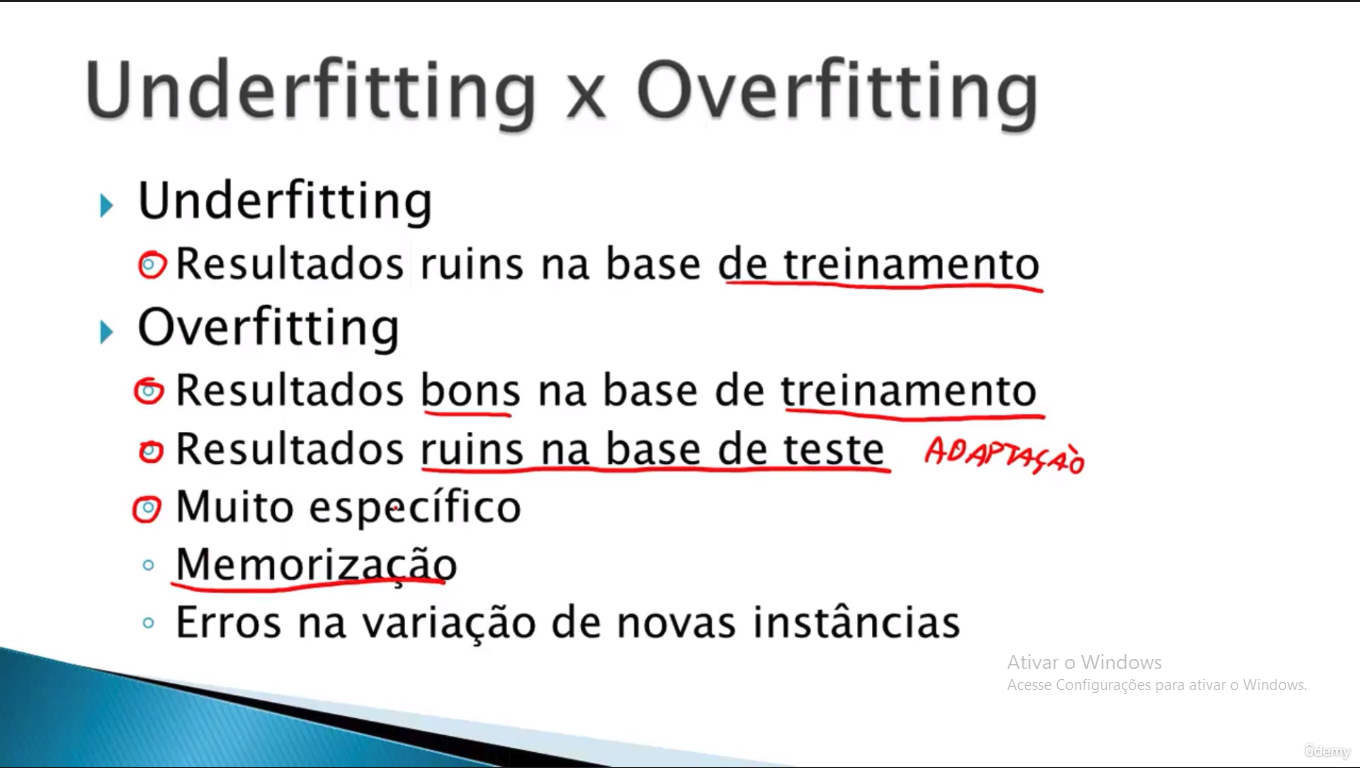

In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

**Abertura dos dados**

In [ ]:
with open('emprestimo_data.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

**Juntando as 2 variáveis de treino e teste, para tuning dos parâmetros**

In [ ]:
data = np.concatenate((x_train, x_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

**Visualizar as features juntas**

In [ ]:
data

array([[2.84231315e+04, 6.16714587e+01, 5.28284918e+03],
       [2.60390215e+04, 4.93904022e+01, 2.05675238e+03],
       [4.77861411e+04, 2.97081893e+01, 7.18147855e+03],
       ...,
       [6.54819456e+04, 4.50385762e+01, 1.06142485e+04],
       [5.62560389e+04, 2.21605025e+01, 5.45224453e+03],
       [5.80823601e+04, 6.01563270e+01, 9.17566732e+03]])

####  <font color=green>Decision Tree - Modelo

**Passando os parâmetros a serem usados no modelo GridSearch**

In [ ]:
parametros_tree = {'criterion': ['gini','entropy'],
                                     'splitter': ['best','random'],  #default, random
                                     'min_samples_split': [2,5,10],
                                     'min_samples_leaf' : [1,5,10]
                                    }

####  <font color=purple>Random Forest - Modelo

In [ ]:
parametros_random = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf' : [1,5,10]
              }

####  <font color=blue>K-Nearest Neighbour (KNN) - modelo

In [ ]:
parametros_knn = {'n_neighbors': [3,5,10,20],
              'p':[1,2]}

####  <font color=teal>Máquina de Vetores de Suporte - SVM

In [ ]:
parametros_svm = {'tol': [0.001, 0.0001,0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['lbfgs', 'linear', 'poly','sigmoid']
              }

***
## Avaliação dos Modelos
***

###  <font color=blue>K-Nearest Neighbour (KNN) - 98.3%

<font size=3>**Quantidade de acerto/score do modelo**

In [ ]:
accuracy_score(y_test, previsoes)

0.9833333333333333

<font size=3>**Relatório de Classificação**

**recall: identifica quem paga o empréstimo**
  * identifica corretamente 98% das pessoas que pagam o empréstimo
  * identifica corretamente 97% das pessoas que não pagam o empréstimo
      * Isso ocorre devido a baixa amostra de dados com essa classe

**precision: quando ele esta correto**
  * ele está correto em 99% dos dados de bons pagadores
  * ele está correto em 89% dos dados de mau pagadores

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=green>Decision Tree - 98.1%

<font size=3>**Quantidade de acerto/score do modelo**

In [ ]:
arvore.score(x_test, y_test)

0.9816666666666667

<font size=3>**Relatório de Classificação**

**recall: identifica quem paga o empréstimo**
  * identifica corretamente 98% das pessoas que pagam o empréstimo
  * identifica corretamente 99% das pessoas que não pagam o empréstimo
      * Isso ocorre devido a baixa amostra de dados com essa classe

**precision: quando ele esta correto**
  * ele está correto em 100% dos dados de bons pagadores
  * ele está correto em 90% dos dados de mau pagadores

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=purple>Random Forest - 98.6%

<font size=3>**Quantidade de acerto/score do modelo**

In [ ]:
random.score(x_test, y_test)

0.9866666666666667

<font size=3>**Relatório de Classificação**

**recall: identifica quem paga o empréstimo**
  * identifica corretamente 98% das pessoas que pagam o empréstimo
  * identifica corretamente 100% das pessoas que não pagam o empréstimo
      * Isso ocorre devido a baixa amostra de dados com essa classe

**precision: quando ele esta correto**
  * ele está correto em 100% dos dados de bons pagadores
  * ele está correto em 91% dos dados de mau pagadores

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=teal>Máquina de Vetores de Suporte - SVM - 98.3%

In [ ]:
svm.score(x_test, y_test)

0.9833333333333333

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.95      0.95      0.95       100

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



###  <font color=brow>Tuning dos parâmetros com GridSearch

####  <font color=green>Decision Tree - 98.7%

**Modelo irá escolher os melhores parâmetros, com melhor score**

In [ ]:
grid_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_tree)
grid_tree.fit(data, label)
melhores_parametros = grid_tree.best_params_
resultado = grid_tree.best_score_
print('Parâmetros: ', melhores_parametros)
print('Score: ', resultado)

Parâmetros:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Score:  0.9869999999999999


**Salvar o modelo que obteve o melhor resultado**

In [ ]:
pickle.dump(grid_tree, open('tree.sav', 'wb'))

**Realizar o teste**

In [ ]:
arvore = pickle.load(open('tree.sav', 'rb'))
arvore.best_score_

0.9869999999999999

####  <font color=purple>Random Forest - 99%

In [ ]:
grid_random = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_random)
grid_random.fit(data, label)
melhores_parametros = grid_random.best_params_
melhor_resultado = grid_random.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9895000000000002


**Salvar o modelo que obteve o melhor resultado**

In [ ]:
pickle.dump(grid_random, open('random.sav', 'wb'))

**Realizar o teste**

In [ ]:
random = pickle.load(open('random.sav', 'rb'))
random.best_score_

0.9895000000000002

####  <font color=blue>K-Nearest Neighbour (KNN) - 85.5%

In [ ]:
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)
grid_knn.fit(data, label)
melhores_parametros = grid_knn.best_params_
melhor_resultado = grid_knn.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.8554999999999999


####  <font color=teal>Máquina de Vetores de Suporte - SVM - 94.5%  (é bem lento)

In [ ]:
grid_svm = GridSearchCV(estimator=SVC(), param_grid=parametros_svm)
grid_svm.fit(data, label)
melhores_parametros = grid_svm.best_params_
melhor_resultado = grid_svm.best_score_
print(melhores_parametros)
print(melhor_resultado)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

{'C': 1.0, 'kernel': 'linear', 'tol': 0.001}
0.9455


###  <font color=red>Validação Cruzada

**cross_val_score:**

É uma função que facilita a aplicação da validação cruzada K-Fold e o **cálculo do desempenho do modelo em cada dobra**.


In [ ]:
from sklearn.model_selection import cross_val_score

**Abrir os modelos já desenvolvidos**

In [ ]:
tree = pickle.load(open('tree.sav', 'rb'))
random = pickle.load(open('random.sav', 'rb'))
svm = pickle.load(open('svm.sav', 'rb'))
knn = pickle.load(open('knn.sav', 'rb'))

**Cálcular o desempenho de cada modelo**

In [ ]:
scores_tree = cross_val_score(tree, data, label, cv=5)
scores_random = cross_val_score(random, data, label, cv=5)
scores_svm = cross_val_score(svm, data, label, cv=5)
scores_knn = cross_val_score(knn, data, label, cv=5)

**Criar um dataframe com os resultados da validação cruzada**

In [ ]:
resultados = pd.DataFrame({
    'Arvore': scores_tree,
    'Random Forest': scores_random,
    'SVM': scores_svm,
    'KNN': scores_knn,
})

resultados

,Arvore,Random Forest,SVM,KNN
0,0.9800,0.9875,0.9900,0.9775
1,0.9925,0.9825,0.9750,0.9725
2,0.9850,0.9925,0.9925,0.9800
3,0.9875,0.9950,0.9825,0.9800
4,0.9900,0.9900,0.9900,0.9825


**Quanto maior a variância, mais dispersos os valores estão em relação à média, e quanto menor a variância, mais próximos eles estão da média.**

In [ ]:
resultados.var()

Arvore           0.000023
Random Forest    0.000023
SVM              0.000052
KNN              0.000014
dtype: float64

**Estatística da Validação Cruzada**

- **Média do Decision Tree:** 98.7%, meu modelo conseguiu este resultado com ajuda do GridSearch

- **Mediana do Random Forest:** 99%, meu modelo conseguiu este resultado com ajuda do GridSearch

- **1° Quartil do SVM:** 98.2%, meu modelo Ficou um pouco acima deste quartil

- **Máximo do KNN:** 98.2%, meu modelo conseguiu 98.3%, o máximo do score

- **Desvio Padrão (std):** quanto menos o valor, mais consistente os resultados, pouca diferença nos resultados, quando for rodar o treino dos dados. Os melhores (**Random, KNN**)

In [ ]:
resultados.describe()

,Arvore,Random Forest,SVM,KNN
count,5.000000,5.000000,5.000000,5.000000
mean,0.987000,0.989500,0.986000,0.978500
std,0.004809,0.004809,0.007202,0.003791
min,0.980000,0.982500,0.975000,0.972500
25%,0.985000,0.987500,0.982500,0.977500
50%,0.987500,0.990000,0.990000,0.980000
75%,0.990000,0.992500,0.990000,0.980000
max,0.992500,0.995000,0.992500,0.982500


### Teste de Shapiro

In [ ]:
from scipy.stats import shapiro
from scipy import stats

**Avalie o p-valor para decidir se rejeitar a hipótese nula**

In [ ]:
alpha = 0.05

- **pvalue** = for igual ou menor que o valor de alpha=0.05, dados não são normais
- **pvalue** = acima do alpha=0.05, são dados normais

In [ ]:
shapiro(scores_tree), shapiro(scores_random), shapiro(scores_knn), shapiro(scores_svm)

(ShapiroResult(statistic=0.9787160754203796, pvalue=0.9276362061500549),
 ShapiroResult(statistic=0.9787160754203796, pvalue=0.9276362061500549),
 ShapiroResult(statistic=0.9140781760215759, pvalue=0.4924813508987427),
 ShapiroResult(statistic=0.8707029223442078, pvalue=0.2692817151546478))

**Visualizar os registros da posição 5**

In [ ]:
novo_registro = data[5]
novo_registro = novo_registro.reshape(1,-1)
novo_registro, novo_registro.reshape

(array([[6.66889131e+04, 4.80852703e+01, 9.69030880e+03]]),
 <function ndarray.reshape>)

***
## Visualização de Resultados
***

#### Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix  # matrix de confusão

# suprimir a exibição de mensagens de aviso (warnings) durante a execução do código em Python.
import warnings
warnings.filterwarnings("ignore")

### Dashboards da base de dados

**Quantidade de registros por idade**
- Não pagaram emprestimo (1)
    - Onde temos mais registros de mau pagadores, estão entre 25 e 29 anos
    - Faixa etária de maus pagadores começa: 18 indo até 35 anos, sendo eles a minoria nessa faixa etária, havendo também bons pagadores, sendo eles a maioria

- Pagaram emprestimo (0)
    - Dos 35 anos em diante, não temos maus pagadores de empréstimo
    - Os melhores pagadores de empréstimos se encontra na casa dos 55 a 57 anos

<Axes: xlabel='idade', ylabel='Count'>

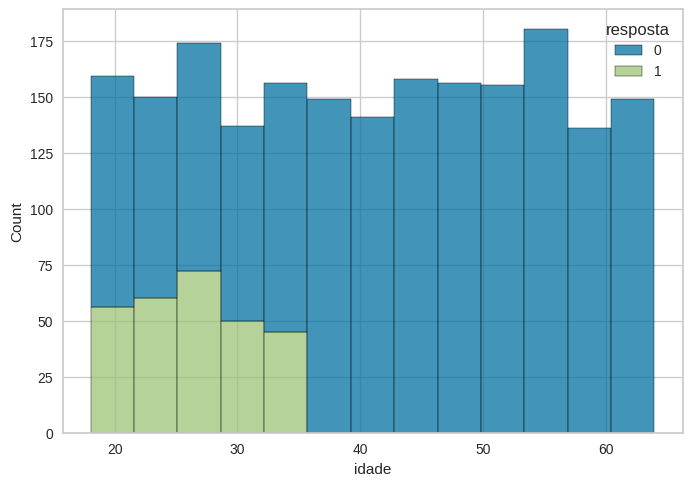

In [ ]:
sns.histplot(data=df, x="idade", hue="resposta", multiple="stack")

**Visualização das dívidas por labels**
- As dívidas de quem pagaram o empréstimo são menores, partindo de 2k até 6k
- As dívidas de quem não pagou o empréstimo são maiores, partindo de 6k até 9k. Podendo está relacionado ao juros devido ao atraso do pagamento.
- Temos algumas exceções (supostos Outliers), de dívidas que ultrapassam 12k, que foram pagas.

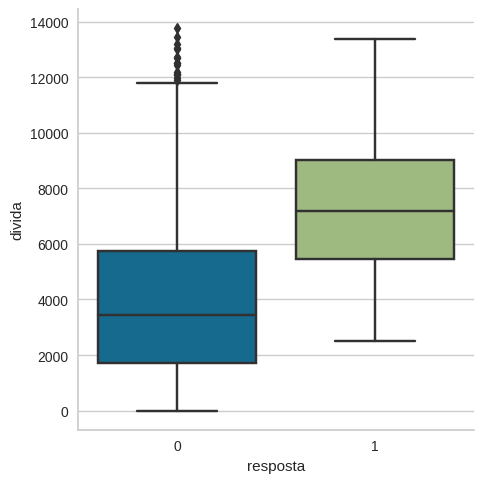

In [ ]:
sns.catplot(data=df, x="resposta", y="divida", kind="box")

**Visualização de renda por labels**
- Ambas as rendas são equivalentes

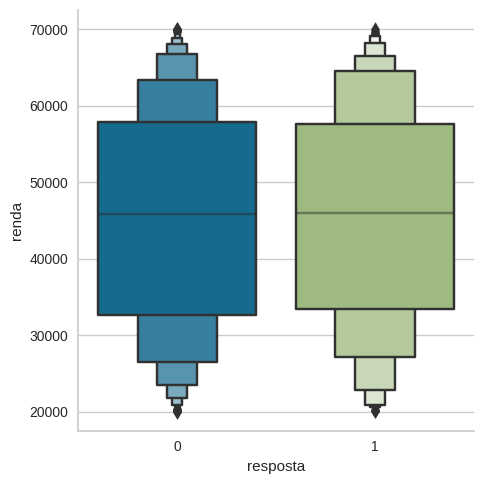

In [ ]:
sns.catplot(
    data=df.sort_values("resposta"),
    x="resposta", y="renda", kind="boxen",
)

**Distribuição dos dados**


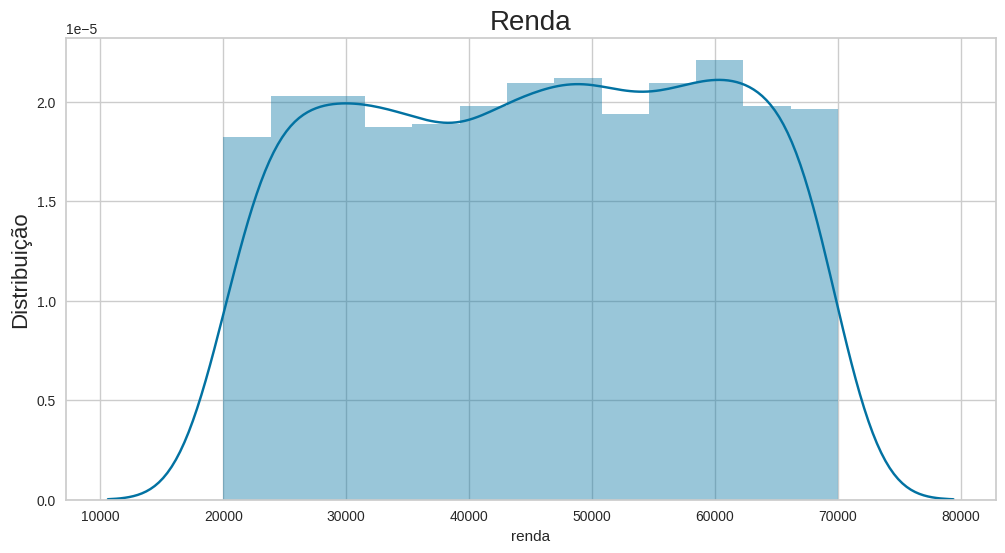

In [ ]:
ax =sns.distplot(df['renda'])
ax.figure.set_size_inches(12,6)
ax.set_title('Renda', fontsize=20)
ax.set_ylabel('Distribuição', fontsize=16)
ax = ax

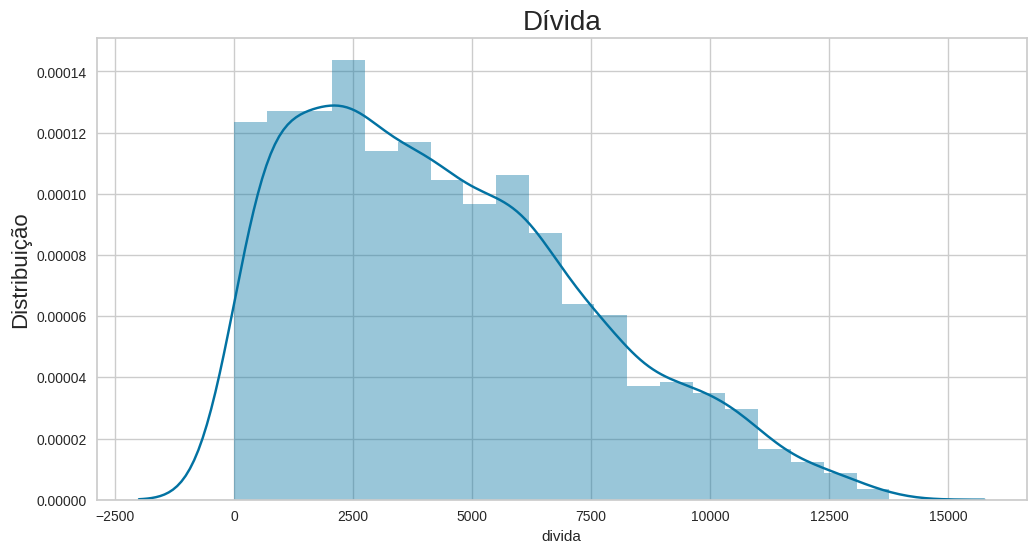

In [ ]:
ax =sns.distplot(df['divida'])
ax.figure.set_size_inches(12,6)
ax.set_title('Dívida', fontsize=20)
ax.set_ylabel('Distribuição', fontsize=16)
ax = ax

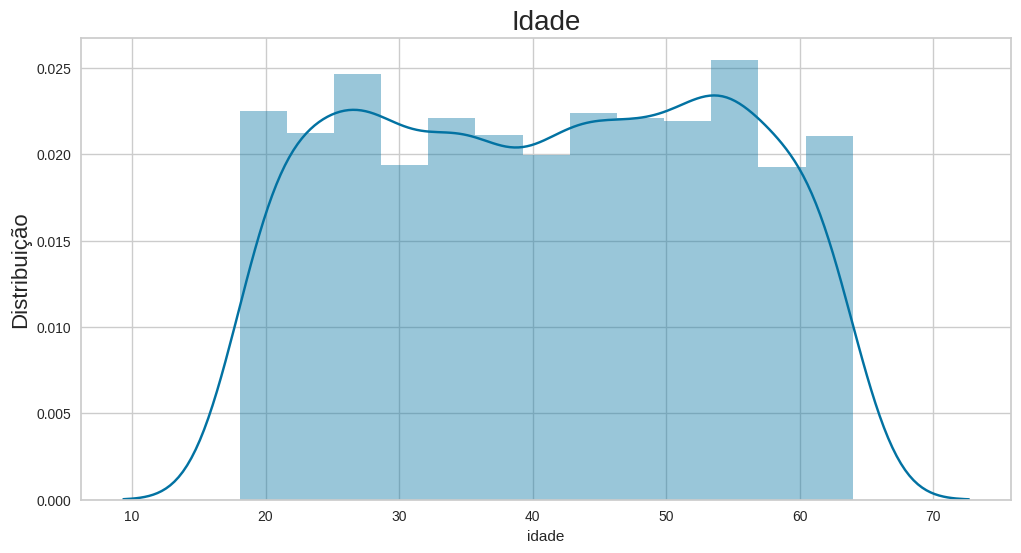

In [ ]:
ax =sns.distplot(df['idade'])
ax.figure.set_size_inches(12,6)
ax.set_title('Idade', fontsize=20)
ax.set_ylabel('Distribuição', fontsize=16)
ax = ax

### Dashboards das máquinas de predição

####  <font color=blue>K-Nearest Neighbour (KNN) - Matrix de Confusão

0.9766666666666667

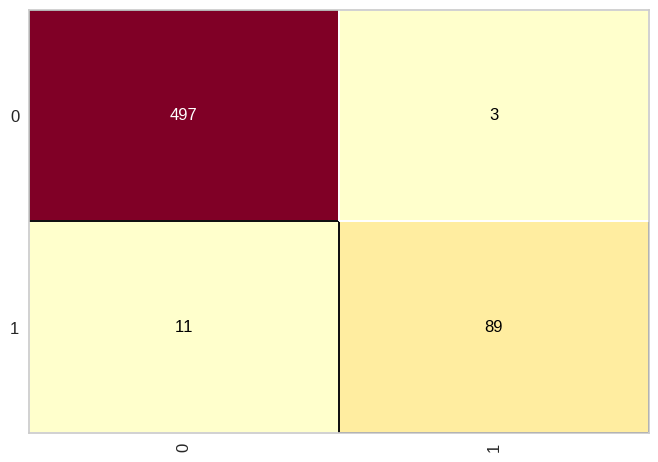

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

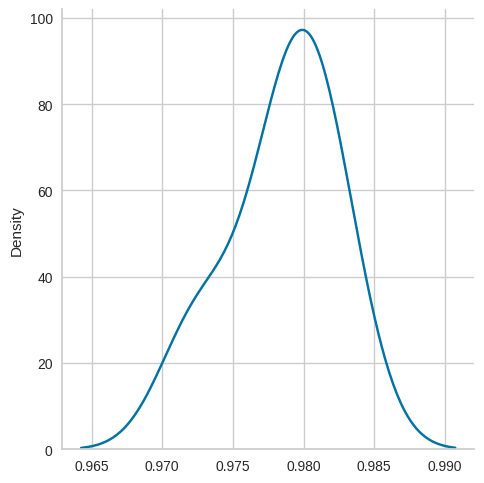

In [ ]:
sns.displot(scores_knn, kind='kde')

####  <font color=green>Decision Tree - Matrix de Confusão

1.0

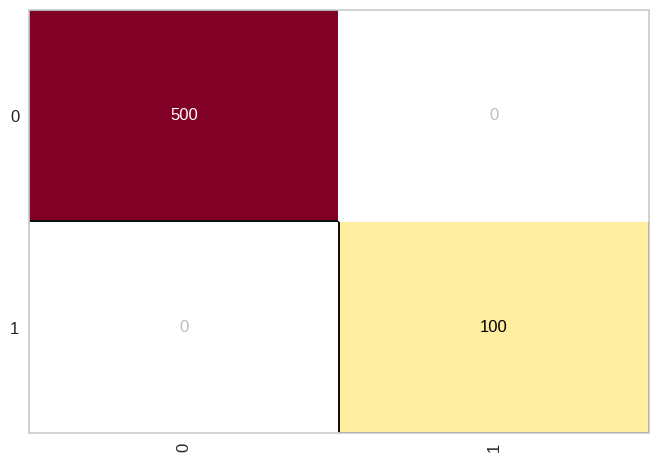

In [ ]:
cm = ConfusionMatrix(arvore)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

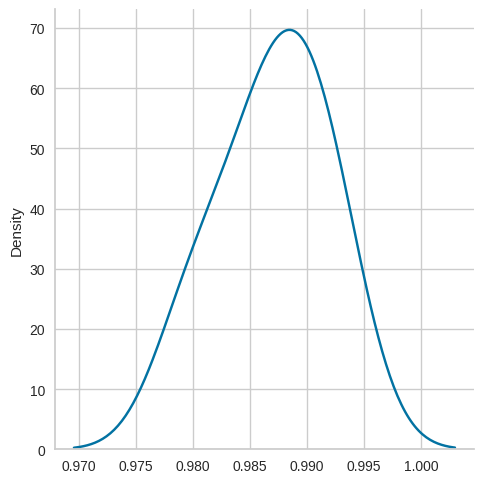

In [ ]:
sns.displot(scores_tree, kind='kde')

####  <font color=purple> Random Forest - Matrix de Confusão

1.0

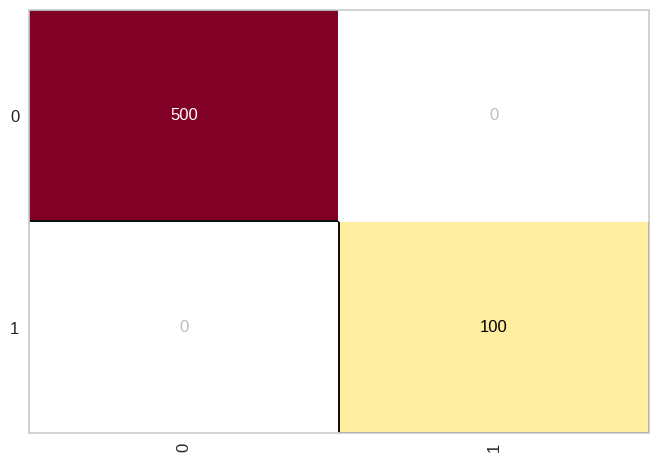

In [ ]:
cm = ConfusionMatrix(random)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

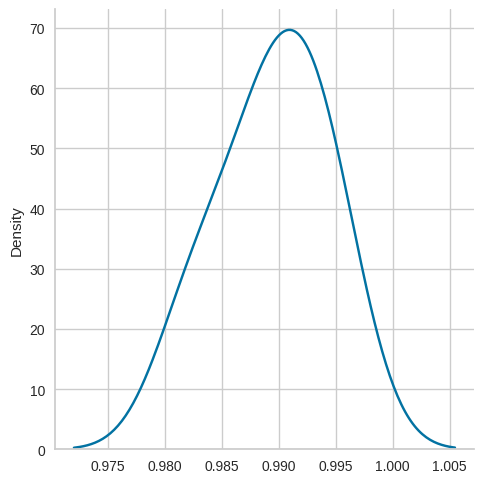

In [ ]:
sns.displot(scores_random, kind='kde')

####  <font color=teal>Máquina de Vetores de Suporte - SVM -Matrix de Confusão

0.9833333333333333

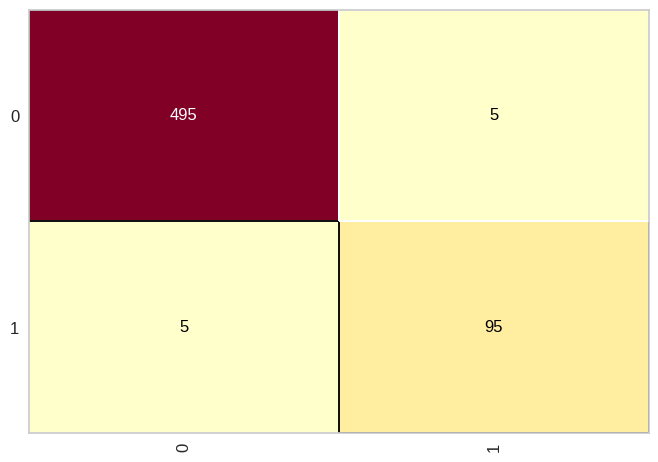

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

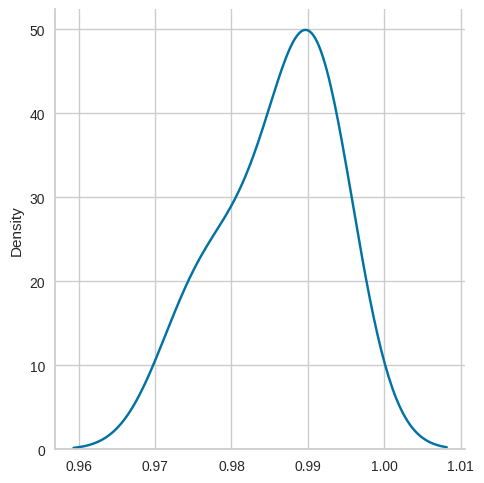

In [ ]:
sns.displot(scores_svm, kind='kde')

***
# <font color=purple size=20 >Algoritmo de Regressão (Python)
***

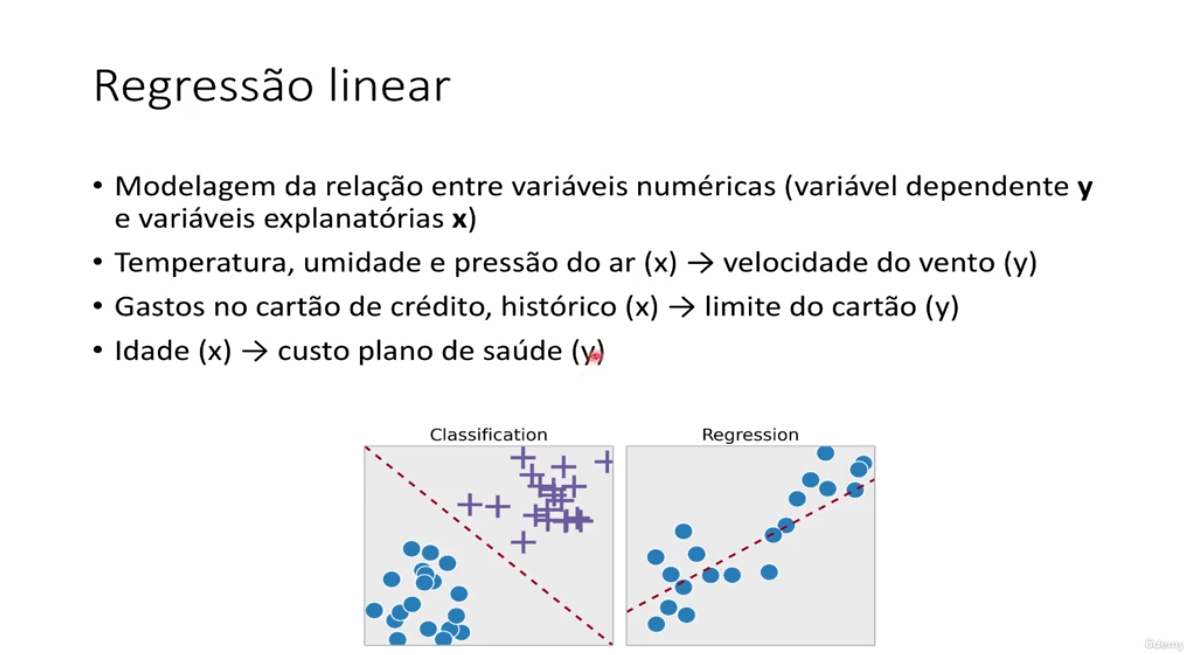

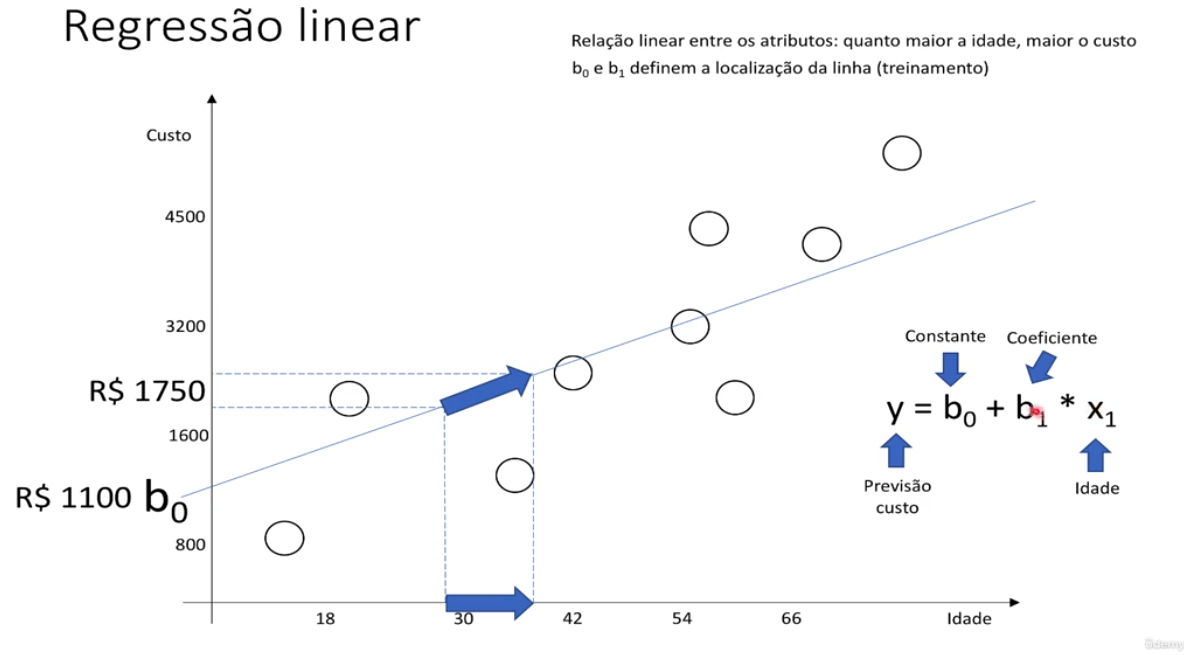

## Regressão linear simples

### Base plano saúde

Instalar biblioteca

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Imports

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Leitura da base de dados

* Idade do beneficiário
* Custo do plano de saúde por idade

In [ ]:
base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


Salvar todos os regitros da coluna 0 (idade),em uma variável. Somente os valores

In [ ]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

Salvar todos os regitros da coluna 1 (custo),em uma variável. Somente os valores

In [ ]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

Verificar a correlação da variável com a própria variável

> 93% dos dados, podem ser explicado

In [ ]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

1 matriz com 10 registros

In [ ]:
X_plano_saude.shape

(10,)

Transforma a matriz de 1 dimensão, em duas dimensões

> 1 colunas com 10 linhas

In [ ]:
X_plano_saude = X_plano_saude.reshape(-1,1)
X_plano_saude.shape

(10, 1)

Máquina de predição


In [ ]:
from sklearn.linear_model import LinearRegression

# Instânciando na variável
regressor_plano_saude = LinearRegression()
# Treinando o modelo com a base
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

Início da linha de regressão

In [ ]:
# b0
regressor_plano_saude.intercept_

-558.9490909090912

Declive da linha

In [ ]:
# b1
regressor_plano_saude.coef_

array([61.86787879])

Previsões do modelo

In [ ]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

Voltar ao formato de vetor , para o criar a visualização com scatter

In [ ]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

Dashboard

In [ ]:
# as bolinhas do gráfico
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
# desenhar a linha no gráfico
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'Regressão')
grafico.show()  # Visualizar

Uma pessoa com 40 anos, terá um custo previsto de 1915.7, no valor do plano de saúde

In [ ]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

Resultado da previsão da máquina

> preveu o mesmo resultado

In [ ]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

Score do algoritmo

> Quanto mais próximo de 1.0, melhor

> 0.86 (86%), um bom resultado

In [ ]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

Dashboard Residual

> Distância dos valores originais, para a linha da regressão linear

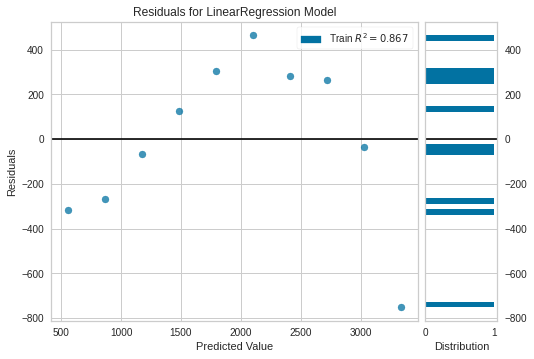

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()

### Base preço das casas - MAE 172.604, 0.48

Prever valores das casas, pelas suas características

Leitura da base de dados

In [ ]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Dados estatísticos

In [ ]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Somar a quantidade de valores nulos dentro da base de dados

In [ ]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Cálculo de correlação com os demais atributos

In [ ]:
base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Mapa de calor(correlação)

> Analisar o preço da casa (price), com as demais variáveis.

> Valores negativo: uma variável não influência na outra

> bathrooms (n°de banheiros): tem uma correlação de 0.53, maior que a correlação do bedrooms(n° quartos) = 0.31. Conclusão: o numero de banheiros influência mais no valor da casa, que o numero de quartos

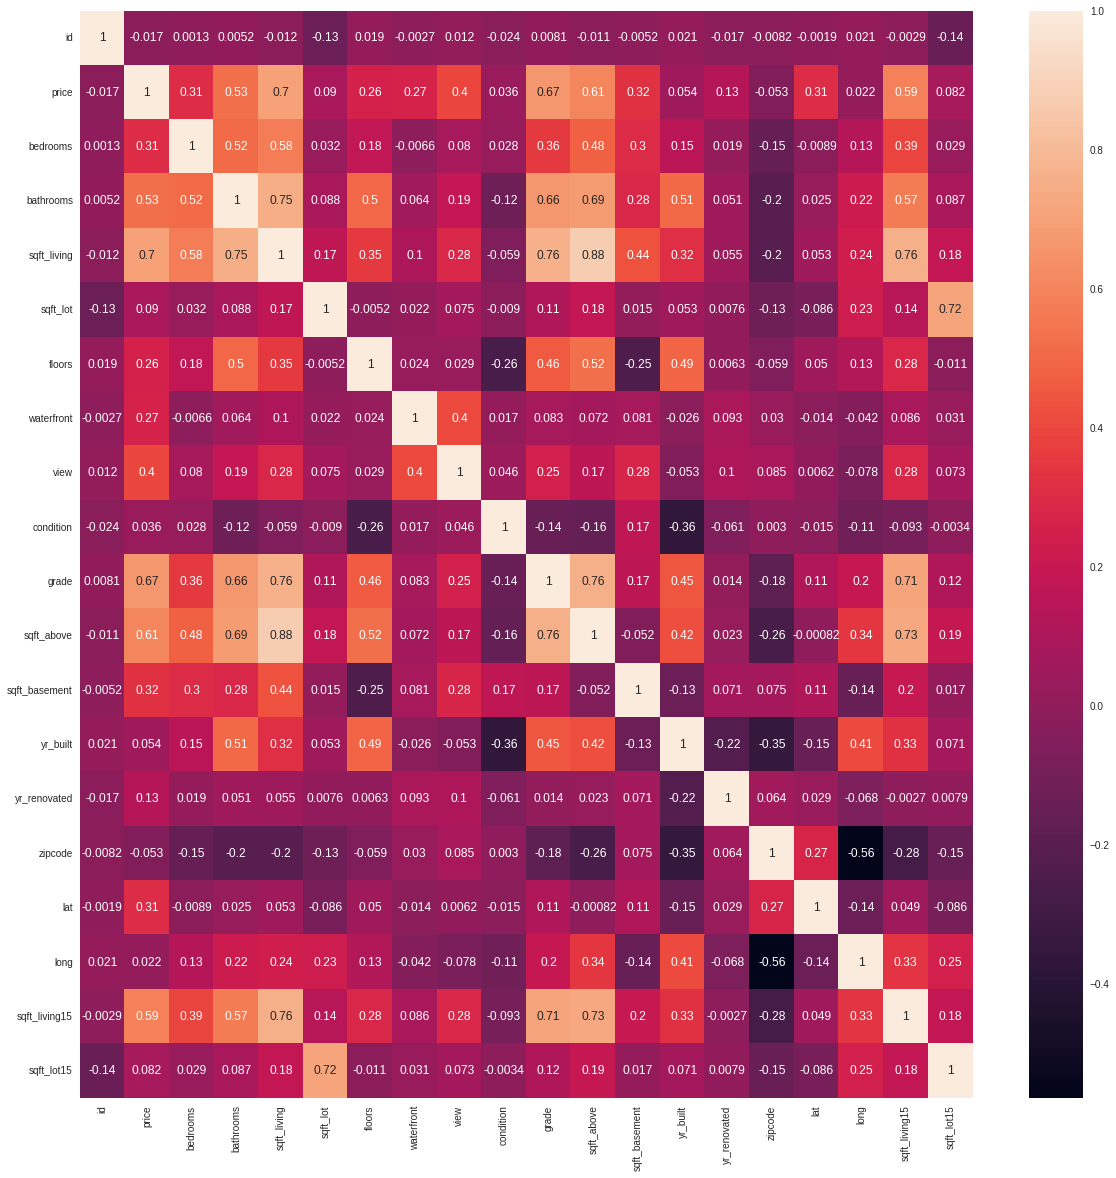

In [ ]:
figura = plt.figure(figsize=(20,20)) # tamanho da imagem (20x20)
sns.heatmap(base_casas.corr(), annot=True);

Pegar todos os registros, somente da coluna 5.

In [ ]:
# coluna: sqft_living 	
X_casas = base_casas.iloc[:,5:6].values
X_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

Todos os registros, somente da coluna 2. Somente valores!!

In [ ]:
# Price (preço)
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

Treinamento dos dados

> Amostras de 70% para treino, 30% para teste

In [ ]:
from sklearn.model_selection import train_test_split

X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

Tamanho das amostras geradas

> sqft_living = 15129   | price = 15129 (treinadas)

In [ ]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

> sqft_living = 6484   | price = 6484 (teste)

In [ ]:
X_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

Algoritmo (Regressão Linear)

In [ ]:
from sklearn.linear_model import LinearRegression

# Instânciando e treinando
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

Início da linha de regressão

In [ ]:
# b0
regressor_simples_casas.intercept_

-37893.59850106726

In [ ]:
# b1
regressor_simples_casas.coef_

array([278.32860644])

Resultado do algoritmo de predição

> Valor muito baixo de treinamento

In [ ]:
regressor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.49453356717789776

Valor muito baixo de teste

In [ ]:
regressor_simples_casas.score(X_casas_teste, y_casas_teste)

0.48889929019453027

Previsões

In [ ]:
previsoes = regressor_simples_casas.predict(X_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

Dashboard

In [ ]:
grafico = px.scatter(x = X_casas_treinamento.ravel(), y = previsoes)
grafico.show()

In [ ]:
grafico1 = px.scatter(x = X_casas_treinamento.ravel(), y = y_casas_treinamento)
grafico2 = px.line(x = X_casas_treinamento.ravel(), y = previsoes)
# Linha vermelha predições do algoritmo
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

Previsões de teste

> Valor da 1° casa: 360.116,00

In [ ]:
previsoes_teste = regressor_simples_casas.predict(X_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

Valores reais

> Valor da 1° casa: 297.000,00

> Previsão do modelo, foi demais 60 mil

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

Diferença média entre os valores reais e os valores do algoritmo

> Algoritmo pode errar 172.604 para cima ou para baixo

In [ ]:
abs(y_casas_teste - previsoes_teste).mean()

172604.1288999542

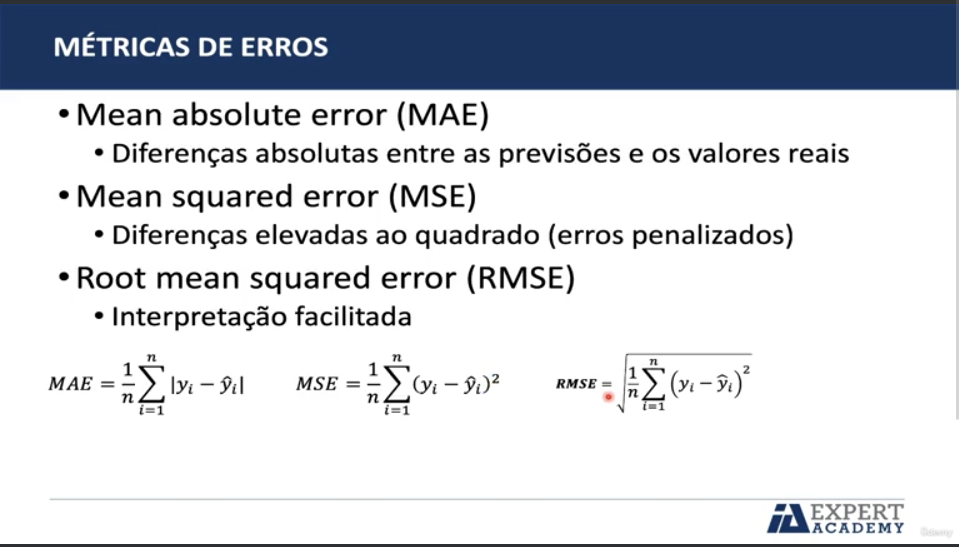

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Mais interessante para o uso

In [ ]:
mean_absolute_error(y_casas_teste, previsoes_teste)

172604.1288999542

In [ ]:
mean_squared_error(y_casas_teste, previsoes_teste)

70170013932.1159

In [ ]:
np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

264896.23238565685

Dashboard

In [ ]:
grafico1 = px.scatter(x = X_casas_teste.ravel(), y = y_casas_teste)
grafico2 = px.line(x = X_casas_teste.ravel(), y = previsoes_teste)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

## Regressão linear múltipla

### Base preço das casas - MAE 123.888, 0.68

In [ ]:
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Salvar na variável as colunas: da 3°posição  (bedrooms) até 19°(long). Somente os dados

In [ ]:
X_casas = base_casas.iloc[:, 3:19].values
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

Salvar todos os registros, somente da coluna na posição 2(price)

In [ ]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

Separar a base em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

Tamanho das amostras

In [ ]:
X_casas_treinamento.shape, X_casas_teste.shape

((15129, 16), (6484, 16))

Algoritmo de previsão

In [ ]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [ ]:
regressor_multiplo_casas.intercept_

5736222.703394298

In [ ]:
regressor_multiplo_casas.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604120e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

Atributos previsores quantidade

In [ ]:
len(regressor_multiplo_casas.coef_)

16

Score do algoritmo

> Obteve um melhor resultado. Algoritmo com somente um atributo, teve um péssimo resultado

In [ ]:
regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.7029888085955007

In [ ]:
regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.6885414149062676

As previsões do algoritmo

In [ ]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([ 383751.77768699, 1514216.17517446,  546921.96179113, ...,
        314968.57623303,  219405.55573556,  148128.83467043])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

Diferença média entre os valores reais e os valores do algoritmo

> Algoritmo pode errar 123.888 para cima ou para baixo, no valor da casa

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_casas_teste, previsoes)

123888.4437748578

## Regressão polinomial

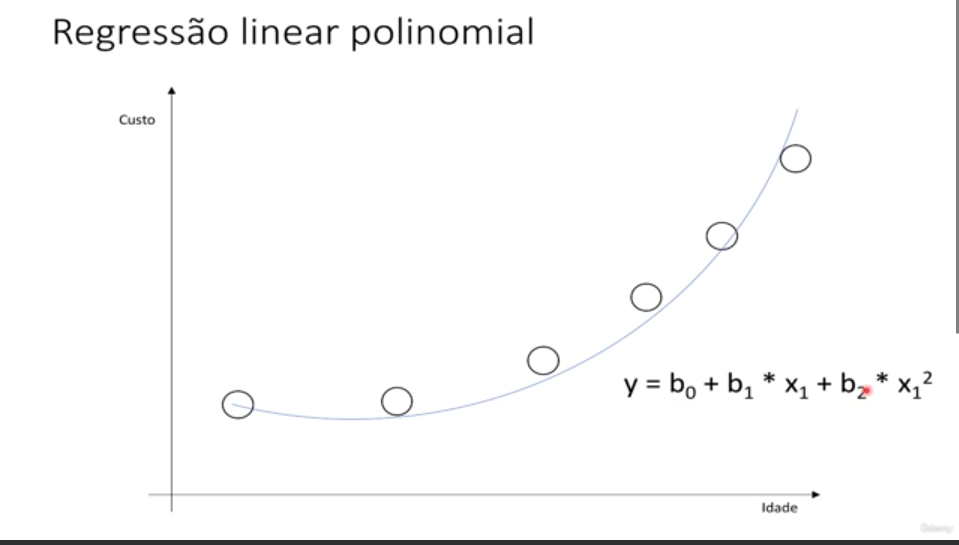

### Base plano de saúde

In [ ]:
base_plano_saude2 = pd.read_csv('plano_saude2.csv')
base_plano_saude2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# separar a base de dados em 2 variáveis, transformando em um array numpy
X_plano_saude2 = base_plano_saude2.iloc[:, 0:1].values
y_plano_saude2 = base_plano_saude2.iloc[:, 1].values

# Ideia do polynomial e elevar os atributos originais da tabela 'idade' ao quadrado
# ex: 18², 23² ...
poly = PolynomialFeatures(degree = 4) # elevando 4x 
X_plano_saude2_poly = poly.fit_transform(X_plano_saude2)

In [ ]:
X_plano_saude2_poly.shape

(10, 5)

In [ ]:
X_plano_saude2_poly[0]

array([1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05])

In [ ]:
X_plano_saude2_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

Algoritmo de predição

In [ ]:
regressor_saude_polinomial = LinearRegression()
regressor_saude_polinomial.fit(X_plano_saude2_poly, y_plano_saude2)

LinearRegression()

In [ ]:
# b0
regressor_saude_polinomial.intercept_

16561.97463791193

In [ ]:
# b1 (n)
regressor_saude_polinomial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [ ]:
# Criar registro em formato de matriz (40 anos)
novo = [[40]]
'''transforma a matriz de uma coluna, 5 colunas. Devido o algoritmo ter sido 
criado desta forma'''
novo = poly.transform(novo)
novo

array([[1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04, 2.56e+06]])

Custo do plano

> Uma pessoa de 40 anos, pagará R$1.335,33

In [ ]:
regressor_saude_polinomial.predict(novo)

array([1335.33958015])

Previsão para toda a base de dados

In [ ]:
'''Custos por idade
18 - R$549,65
23 - R$345.85
28 - R$616,53
33 - R$975,83
'''
previsoes = regressor_saude_polinomial.predict(X_plano_saude2_poly)
previsoes

array([ 549.65035464,  345.85081575,  616.53845992,  975.8391595 ,
       1249.06759853, 1472.7272727 , 1894.51048941, 2973.2983677 ,
       5379.16083828, 9993.35664357])

Dashboard

In [ ]:
grafico = px.scatter(x = X_plano_saude2[:,0], y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:,0], y = previsoes, name = 'Regressão')
grafico.show()

### Base preço das casas - MAE 101.225, 0.81

Tamanho das amostras

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_teste.shape

(6484, 16)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_casas_treinamento_poly = poly.fit_transform(X_casas_treinamento)
X_casas_teste_poly = poly.transform(X_casas_teste)

In [ ]:
X_casas_treinamento_poly.shape, X_casas_teste_poly.shape

((15129, 153), (6484, 153))

Algoritmo de predição

In [ ]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(X_casas_treinamento_poly, y_casas_treinamento)

LinearRegression()

Resultado

In [ ]:
regressor_casas_poly.score(X_casas_treinamento_poly, y_casas_treinamento)

0.8179291296855723

In [ ]:
regressor_casas_poly.score(X_casas_teste_poly, y_casas_teste)

0.8153028400650266

Predições do algoritmo

In [ ]:
previsoes = regressor_casas_poly.predict(X_casas_teste_poly)
previsoes

array([ 385879.30371094, 1990804.75125122,  578376.72340393, ...,
        433301.44465637,  233954.5686264 ,  123613.70202637])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
mean_absolute_error(y_casas_teste, previsoes)

101233.04073967483

## Regressão Árvores de decisão

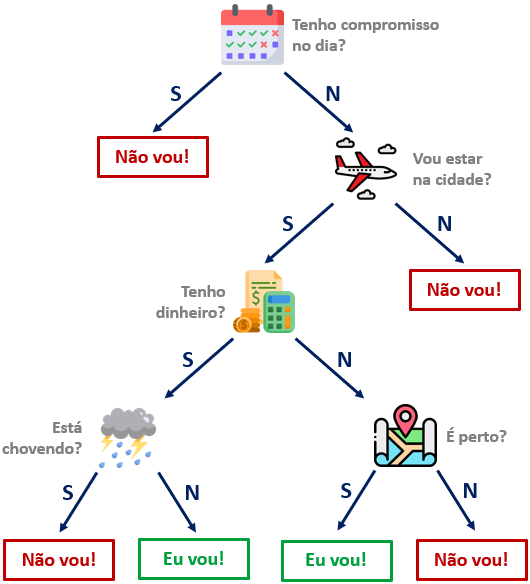

### Base plano saúde

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

Algoritmo de predição

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(X_plano_saude2, y_plano_saude2)

DecisionTreeRegressor()

Previsões

In [ ]:
previsoes = regressor_arvore_saude.predict(X_plano_saude2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

Resultado

In [ ]:
regressor_arvore_saude.score(X_plano_saude2, y_plano_saude2)

1.0

Dashboard

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

In [ ]:
X_teste_arvore = np.arange(min(X_plano_saude2), max(X_plano_saude2), 0.1)
X_teste_arvore

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [ ]:
X_teste_arvore.shape

(450,)

In [ ]:
X_teste_arvore = X_teste_arvore.reshape(-1,1)
X_teste_arvore.shape

(450, 1)

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_arvore_saude.predict(X_teste_arvore), name = 'Regressão')
grafico.show()

In [ ]:
regressor_arvore_saude.predict([[40.6]])

array([1530.])

### Base preço das casas - MAE 99.917, 0.73

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [ ]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [ ]:
X_casas_teste.shape

(6484, 16)

In [ ]:
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(X_casas_treinamento, y_casas_treinamento)

DecisionTreeRegressor()

In [ ]:
regressor_arvore_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9992712177726063

In [ ]:
regressor_arvore_casas.score(X_casas_teste, y_casas_teste)

0.7043387625954829

In [ ]:
previsoes = regressor_arvore_casas.predict(X_casas_teste)
previsoes

array([ 288000., 2340000.,  480000., ...,  289000.,  215000.,  205000.])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

99924.67635718692

## Random forest

### Base plano de saúde

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest_saude = RandomForestRegressor(n_estimators = 10)
regressor_random_forest_saude.fit(X_plano_saude2, y_plano_saude2)

RandomForestRegressor(n_estimators=10)

In [ ]:
regressor_random_forest_saude.score(X_plano_saude2, y_plano_saude2)

0.9636212604967844

In [ ]:
X_teste_arvore

array([[18. ],
       [18.1],
       [18.2],
       [18.3],
       [18.4],
       [18.5],
       [18.6],
       [18.7],
       [18.8],
       [18.9],
       [19. ],
       [19.1],
       [19.2],
       [19.3],
       [19.4],
       [19.5],
       [19.6],
       [19.7],
       [19.8],
       [19.9],
       [20. ],
       [20.1],
       [20.2],
       [20.3],
       [20.4],
       [20.5],
       [20.6],
       [20.7],
       [20.8],
       [20.9],
       [21. ],
       [21.1],
       [21.2],
       [21.3],
       [21.4],
       [21.5],
       [21.6],
       [21.7],
       [21.8],
       [21.9],
       [22. ],
       [22.1],
       [22.2],
       [22.3],
       [22.4],
       [22.5],
       [22.6],
       [22.7],
       [22.8],
       [22.9],
       [23. ],
       [23.1],
       [23.2],
       [23.3],
       [23.4],
       [23.5],
       [23.6],
       [23.7],
       [23.8],
       [23.9],
       [24. ],
       [24.1],
       [24.2],
       [24.3],
       [24.4],
       [24.5],
       [24

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_random_forest_saude.predict(X_teste_arvore), name = 'Regressão')
grafico.show()

In [ ]:
regressor_random_forest_saude.predict([[40]])

array([1162.])

### Base preço das casas - MAE 67.615, 0.88

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [ ]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [ ]:
X_casas_teste

array([[ 2.00000e+00,  1.50000e+00,  1.43000e+03, ...,  9.81250e+04,
         4.77222e+01, -1.22290e+02],
       [ 4.00000e+00,  3.25000e+00,  4.67000e+03, ...,  9.80050e+04,
         4.76350e+01, -1.22164e+02],
       [ 2.00000e+00,  7.50000e-01,  1.44000e+03, ...,  9.81070e+04,
         4.76707e+01, -1.22364e+02],
       ...,
       [ 3.00000e+00,  2.50000e+00,  2.15000e+03, ...,  9.80580e+04,
         4.74514e+01, -1.22089e+02],
       [ 3.00000e+00,  1.75000e+00,  1.48000e+03, ...,  9.80320e+04,
         4.73657e+01, -1.22280e+02],
       [ 3.00000e+00,  1.00000e+00,  1.32000e+03, ...,  9.80920e+04,
         4.73120e+01, -1.22183e+02]])

In [ ]:
regressor_random_forest_casas = RandomForestRegressor(n_estimators=100)
regressor_random_forest_casas.fit(X_casas_treinamento, y_casas_treinamento)

RandomForestRegressor()

In [ ]:
regressor_random_forest_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9805690570189144

In [ ]:
regressor_random_forest_casas.score(X_casas_teste, y_casas_teste)

0.8808150923594946

In [ ]:
previsoes = regressor_random_forest_casas.predict(X_casas_teste)
previsoes

array([ 302646.08 , 1715958.9  ,  533418.   , ...,  367195.88 ,
        233929.23 ,  201909.066])

In [ ]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

68088.07038927078

## SVM

### Base plano de saúde

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
# Kernel linear
from sklearn.svm import SVR
regressor_svr_saude_linear = SVR(kernel = 'linear')
regressor_svr_saude_linear.fit(X_plano_saude2, y_plano_saude2)

SVR(kernel='linear')

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = regressor_svr_saude_linear.predict(X_plano_saude2), name = 'Regressão')
grafico.show()

In [ ]:
# Kernel polinomial
regressor_svr_saude_poly = SVR(kernel='poly', degree=4)
regressor_svr_saude_poly.fit(X_plano_saude2, y_plano_saude2)

SVR(degree=4, kernel='poly')

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = regressor_svr_saude_poly.predict(X_plano_saude2), name = 'Regressão')
grafico.show()

In [ ]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_plano_saude2_scaled = scaler_x.fit_transform(X_plano_saude2)
scaler_y = StandardScaler()
y_plano_saude2_scaled = scaler_y.fit_transform(y_plano_saude2.reshape(-1,1))

In [ ]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [ ]:
# Kernel rbf
regressor_svr_saude_rbf = SVR(kernel='rbf')
regressor_svr_saude_rbf.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

SVR()

In [ ]:
grafico = px.scatter(x = X_plano_saude2_scaled.ravel(), y = y_plano_saude2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude2_scaled.ravel(), y = regressor_svr_saude_rbf.predict(X_plano_saude2_scaled), name = 'Regressão')
grafico.show()

In [ ]:
novo = [[40]]

In [ ]:
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [ ]:
#scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo)) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)

In [ ]:
scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo).reshape(-1, 1))

array([[1333.85650748]])

### Base preço das casas - MAE 82.453, 0.73

In [ ]:
X_casas_treinamento.shape

(15129, 16)

In [ ]:
X_casas_treinamento

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [ ]:
y_casas_treinamento

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [ ]:
X_casas_teste.shape

(6484, 16)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x_casas = StandardScaler()
X_casas_treinamento_scaled = scaler_x_casas.fit_transform(X_casas_treinamento)
scaler_y_casas = StandardScaler()
y_casas_treinamento_scaled = scaler_y_casas.fit_transform(y_casas_treinamento.reshape(-1,1))

In [ ]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [ ]:
y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [ ]:
X_casas_treinamento_scaled.shape, y_casas_treinamento_scaled.shape

((15129, 16), (15129, 1))

In [ ]:
X_casas_teste_scaled = scaler_x_casas.transform(X_casas_teste)
y_casas_teste_scaled = scaler_y_casas.transform(y_casas_teste.reshape(-1,1))

In [ ]:
X_casas_teste_scaled.shape, y_casas_teste_scaled.shape

((6484, 16), (6484, 1))

In [ ]:
X_casas_teste_scaled

array([[-1.44563583, -0.79711466, -0.70193254, ...,  0.88741047,
         1.17204161, -0.53947092],
       [ 0.67170039,  1.47093569,  2.80513482, ..., -1.36052304,
         0.54321655,  0.35604518],
       [-1.44563583, -1.76913625, -0.69110826, ...,  0.55022044,
         0.80065984, -1.06540895],
       ...,
       [-0.38696772,  0.49891411,  0.07741576, ..., -0.36768574,
        -0.78077751,  0.88909048],
       [-0.38696772, -0.47310747, -0.64781113, ..., -0.854738  ,
        -1.39878563, -0.46839822],
       [-0.38696772, -1.44512905, -0.82099964, ...,  0.26922876,
        -1.78603226,  0.22100704]])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
regressor_svr_casas = SVR(kernel='rbf')
regressor_svr_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

SVR()

In [ ]:
regressor_svr_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8123337393146999

In [ ]:
regressor_svr_casas.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.7374454724624955

In [ ]:
#previsoes = regressor_svr_casas.predict(X_casas_teste_scaled) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)
#previsoes

In [ ]:
previsoes = regressor_svr_casas.predict(X_casas_teste_scaled).reshape(-1, 1)
previsoes

array([[-0.54571552],
       [ 3.46454238],
       [ 0.02286424],
       ...,
       [-0.46405796],
       [-0.91113329],
       [-1.03334346]])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes)

In [ ]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [ ]:
previsoes_inverse

array([[ 341068.00437506],
       [1807402.87779178],
       [ 548966.93331462],
       ...,
       [ 370925.76457821],
       [ 207454.44649635],
       [ 162768.78477289]])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

82453.0219893096

## Redes neurais artificiais

### Base plano de saúde

In [ ]:
X_plano_saude2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y_plano_saude2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [ ]:
from sklearn.neural_network import MLPRegressor
regressor_rna_saude = MLPRegressor(max_iter=1000)
regressor_rna_saude.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

MLPRegressor(max_iter=1000)

In [ ]:
regressor_rna_saude.score(X_plano_saude2_scaled, y_plano_saude2_scaled)

0.9492787786035837

In [ ]:
grafico = px.scatter(x = X_plano_saude2_scaled.ravel(), y = y_plano_saude2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude2_scaled.ravel(), y = regressor_rna_saude.predict(X_plano_saude2_scaled), name = 'Regressão')
grafico.show()

In [ ]:
novo = [[40]]
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [ ]:
##scaler_y.inverse_transform(regressor_rna_saude.predict(novo)) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)

In [ ]:
scaler_y.inverse_transform(regressor_rna_saude.predict(novo).reshape(-1, 1))

array([[1035.53068313]])

### Base preço das casas - MAE 76.311, 0.87

In [ ]:
X_casas_treinamento_scaled.shape

(15129, 16)

In [ ]:
X_casas_treinamento_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [ ]:
y_casas_treinamento_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [ ]:
X_casas_teste_scaled.shape

(6484, 16)

In [ ]:
(16 + 1) / 2

8.5

In [ ]:
# 16 -> 9 -> 9 -> 1
regressor_rna_casas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [ ]:
regressor_rna_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8957851760541201

In [ ]:
regressor_rna_casas.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.8829032673414091

In [ ]:
##previsoes = regressor_rna_casas.predict(X_casas_teste_scaled) -- Atualizado 17/08/2022 -- Inclusão .reshape(-1, 1)
##previsoes

In [ ]:
previsoes = regressor_rna_casas.predict(X_casas_teste_scaled).reshape(-1, 1)
previsoes

array([[-0.62257673],
       [ 3.15823802],
       [ 0.0060229 ],
       ...,
       [-0.6398629 ],
       [-0.86445047],
       [-0.87403925]])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes)

In [ ]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [ ]:
previsoes_inverse

array([[ 312964.00820757],
       [1695403.9062343 ],
       [ 542808.96556917],
       ...,
       [ 306643.38759994],
       [ 224523.8342576 ],
       [ 221017.73606687]])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

74774.25630637241